In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kdelearn.kde_funcs import KdeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_moons

# Various data shapes

In [2]:
def prepare_grid(x1_min, x1_max, x2_min, x2_max, grid_size):
    """Prepare 2d grid for plotting decision boundary."""
    x1 = np.linspace(x1_min, x1_max, grid_size)
    x2 = np.linspace(x2_min, x2_max, grid_size)
    x1v, x2v = np.meshgrid(x1, x2)
    x1p = x1v.reshape(-1, 1)
    x2p = x2v.reshape(-1, 1)
    x_grid = np.hstack((x1p, x2p))
    
    return x1p, x2p, x_grid

In [17]:
def plot_decisiony_bountry(x1_min, x1_max, x2_min, x2_max, x1p, x2p,
                           Classifier, x_train, labels_train, x_grid, x_test, labels_test):
    model = Classifier().fit(x_train, labels_train)
    # Classify test dataset
    labels_test_pred = model.predict(x_test)
    test_accuracy = (labels_test_pred==labels_test).sum() / labels_test.shape[0]
    print(f"[Test accuracy]: {test_accuracy * 100}%")

    # Classify grid points
    labels_grid_pred = model.predict(x_grid)
    plt.figure(figsize=(7, 5))
    for label, color in zip(np.unique(labels_train), ["cornflowerblue", "goldenrod"]):
        mask1 = (labels_train == label)
        plt.scatter(x_train[mask1, 0], x_train[mask1, 1], facecolors="none",
                    edgecolors=color, label=f"class {label}", alpha=0.4)
        mask2 = (labels_grid_pred == label)
        plt.scatter(x1p[mask2, 0], x2p[mask2, 0],
                    color=color, marker=".", alpha=0.15)
    plt.xlim(x1_min, x1_max); plt.ylim(x2_min, x2_max);
    plt.xlabel("$x_1$", fontsize=11); plt.ylabel("$x_2$", rotation=0, fontsize=11);
    plt.legend(); plt.title(f"Decision boundry determined by {Classifier.__name__}", fontsize=11);
    plt.show()

## Moons - data

In [18]:
np.random.seed(0)
x_train, labels_train = make_moons(n_samples=10_000, noise=0.1)
labels_train += 1
x_test, labels_test = make_moons(n_samples=1000, noise=0.1)
labels_test += 1

x1p, x2p, x_grid = prepare_grid(x1_min=-2, x1_max=3, x2_min=-1, x2_max=1.5, grid_size=70)

### KdeClassifier

[Test accuracy]: 99.7%


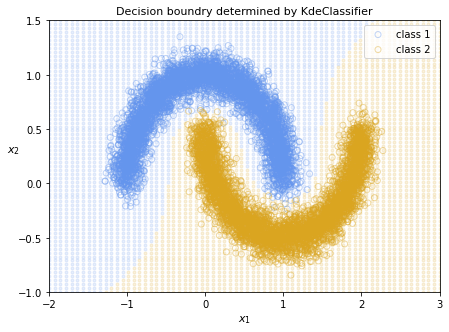

In [19]:
plot_decisiony_bountry(x1_min=-2, x1_max=3, x2_min=-1, x2_max=1.5, x1p=x1p, x2p=x2p,
                       Classifier=KdeClassifier, x_train=x_train, labels_train=labels_train,
                       x_grid=x_grid, x_test=x_test, labels_test=labels_test)

### GaussianNB

[Test accuracy]: 87.6%


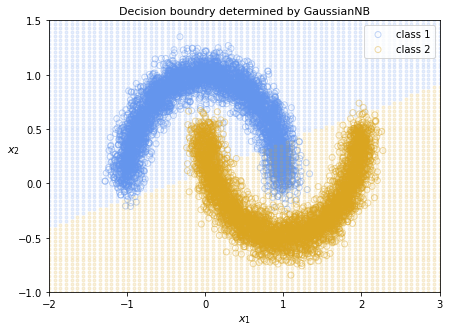

In [20]:
plot_decisiony_bountry(x1_min=-2, x1_max=3, x2_min=-1, x2_max=1.5, x1p=x1p, x2p=x2p,
                       Classifier=GaussianNB, x_train=x_train, labels_train=labels_train,
                       x_grid=x_grid, x_test=x_test, labels_test=labels_test)

## Gaussian mixture - data

In [21]:
np.random.seed(1)

cov = [[1, 0], [0, 1]]

# Prepare train data
m_train = 10_000
## class 1
x_train1 = np.random.multivariate_normal([0, 0], cov, m_train // 2)
labels_train1 = np.full(m_train // 2, 1)
## class 2
x_train2 = np.random.multivariate_normal([3, 3], cov, m_train // 2)
labels_train2 = np.full(m_train // 2, 2)
x_train = np.concatenate((x_train1, x_train2))  # shape (1000, 2)
labels_train = np.concatenate((labels_train1, labels_train2))  # shape (1000,)

# Prepare test data
m_test = 1000
## class 1
x_test1 = np.random.multivariate_normal([0, 0], cov, m_test // 2)
labels_test1 = np.full(m_test // 2, 1)
## class 2
x_test2 = np.random.multivariate_normal([3, 3], cov, m_test // 2)
labels_test2 = np.full(m_test // 2, 2)
x_test = np.concatenate((x_test1, x_test2))  # shape (1000, 2)
labels_test = np.concatenate((labels_test1, labels_test2))  # shape (1000,)

x1p, x2p, x_grid = prepare_grid(x1_min=-6, x1_max=8, x2_min=-6, x2_max=8, grid_size=70)

### KdeClassifier

[Test accuracy]: 98.2%


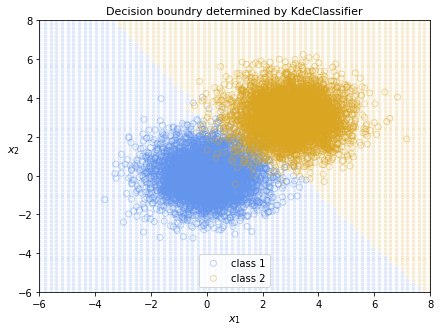

In [22]:
plot_decisiony_bountry(x1_min=-6, x1_max=8, x2_min=-6, x2_max=8, x1p=x1p, x2p=x2p,
                       Classifier=KdeClassifier, x_train=x_train, labels_train=labels_train,
                       x_grid=x_grid, x_test=x_test, labels_test=labels_test)

### GaussianNB

[Test accuracy]: 98.2%


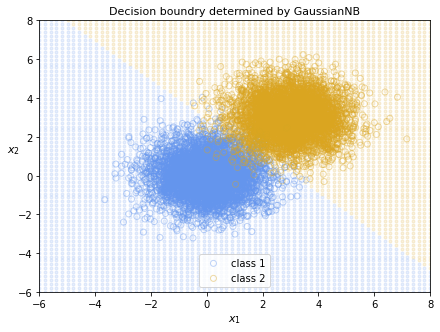

In [23]:
plot_decisiony_bountry(x1_min=-6, x1_max=8, x2_min=-6, x2_max=8, x1p=x1p, x2p=x2p,
                       Classifier=GaussianNB, x_train=x_train, labels_train=labels_train,
                       x_grid=x_grid, x_test=x_test, labels_test=labels_test)